# Arrays 

In [1]:
import numpy as np

In [2]:
a = np.zeros((2, 3), dtype=np.float32)
a

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [3]:
a.__class__

numpy.ndarray

In [4]:
a += 1
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
a *= 2
a

array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [6]:
ones = lambda *shape: np.ones(shape, dtype=np.float32)

In [7]:
ones(3, 3)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

# Task

Pretty print A + B = C 

In [8]:
my_input = [ones(2, 3), "+", ones(2, 3), "=", ones(2, 3) * 2]
print(my_input)
print(*my_input)
display(*my_input)

[array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), '+', array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), '=', array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)]
[[1. 1. 1.]
 [1. 1. 1.]] + [[1. 1. 1.]
 [1. 1. 1.]] = [[2. 2. 2.]
 [2. 2. 2.]]


array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

'+'

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

'='

array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [9]:
def pretty_print(*lst):
    pass
pretty_print(*my_input)

In [10]:
lines = [str(a).split("\n") for a in my_input]
lines

[['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['+'],
 ['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['='],
 ['[[2. 2. 2.]', ' [2. 2. 2.]]']]

In [11]:
max_lines = max([len(line) for line in lines])
max_lines

2

In [12]:
lines = [line + [""] * (max_lines - len(line)) for line in lines]
lines

[['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['+', ''],
 ['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['=', ''],
 ['[[2. 2. 2.]', ' [2. 2. 2.]]']]

# Transpose, reshape, max

In [13]:
lines_arr = np.array(lines)
lines_arr.T

array([['[[1. 1. 1.]', '+', '[[1. 1. 1.]', '=', '[[2. 2. 2.]'],
       [' [1. 1. 1.]]', '', ' [1. 1. 1.]]', '', ' [2. 2. 2.]]']],
      dtype='<U12')

In [14]:
widths = [len(x) for x in lines]
widths

[2, 2, 2, 2, 2]

In [15]:
lines_arr.shape, lines_arr.flatten().shape

((5, 2), (10,))

In [16]:
widths = np.array([len(x) for x in lines_arr.flatten()])
print(widths)
widths = widths.reshape(len(lines_arr), -1)
widths

[11 12  1  0 11 12  1  0 11 12]


array([[11, 12],
       [ 1,  0],
       [11, 12],
       [ 1,  0],
       [11, 12]])

In [17]:
widths.reshape(*lines_arr.shape)
widths

array([[11, 12],
       [ 1,  0],
       [11, 12],
       [ 1,  0],
       [11, 12]])

In [18]:
np.max(widths)

12

In [19]:
np.max(widths, axis=1)

array([12,  1, 12,  1, 12])

In [20]:
lines_widths = widths.max(axis=1)
lines_widths

array([12,  1, 12,  1, 12])

In [21]:
lines = [str(a).split("\n") for a in my_input]
max_lines = max([len(line) for line in lines])
max_lines

2

In [22]:
def format_item(lines, max_lines=0):
    max_width = max([len(line) for line in lines])
    empty = " " * max_width
    lines = [line.ljust(max_width) for line in lines]
    lines += [empty] * (max_lines - len(lines))
    return lines

res = format_item(str(np.arange(1, 5).reshape(2, -1)).split("\n"), max_lines=3)
print("\n".join(res))

[[1 2] 
 [3 4]]
       


In [23]:
def pretty_print(*lst):
    lines = [str(item).split("\n") for item in lst]
    max_lines = max([len(item) for item in lines])
    lines = [format_item(item, max_lines=max_lines) for item in lines]
    lines_t = np.array(lines).T
    print("\n".join([" ".join(line) for line in lines_t]))

pretty_print(*my_input)

[[1. 1. 1.]  + [[1. 1. 1.]  = [[2. 2. 2.] 
 [1. 1. 1.]]    [1. 1. 1.]]    [2. 2. 2.]]


# Lets test our function

In [24]:
A = np.arange(1, 11).reshape(5, 2)
B = np.linspace(10, 30, 10).reshape(5, 2)
R = A * B

pretty_print(A, "*", B, "=", R)

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [14.44444444 16.66666667]     [ 43.33333333  66.66666667] 
 [ 5  6]     [18.88888889 21.11111111]     [ 94.44444444 126.66666667] 
 [ 7  8]     [23.33333333 25.55555556]     [163.33333333 204.44444444] 
 [ 9 10]]    [27.77777778 30.        ]]    [250.         300.        ]]


In [25]:
import operator

def op(x, name, y, func):
    r = func(x, y)
    pretty_print(x, name, y, "=", r)

op(np.array([[1,2], [3, 4]]), "+", np.array([[5, 6], [7, 7]]), operator.add)

[[1 2]  + [[5 6]  = [[ 6  8] 
 [3 4]]    [7 7]]    [10 11]]


In [26]:
class Op:
    def __init__(self, name, func):
        self.name = name
        self.func = func

    def __call__(self, x, y):
        r = self.func(x, y)
        pretty_print(x, self.name, y, "=", r)

SSum = Op("+", lambda x, y: x + y)
SMul = Op("*", lambda x, y: x * y)
SDel = Op("-", lambda x, y: x - y)
MMul = Op("@", lambda x, y: x @ y)

SMul(A, B)


[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [14.44444444 16.66666667]     [ 43.33333333  66.66666667] 
 [ 5  6]     [18.88888889 21.11111111]     [ 94.44444444 126.66666667] 
 [ 7  8]     [23.33333333 25.55555556]     [163.33333333 204.44444444] 
 [ 9 10]]    [27.77777778 30.        ]]    [250.         300.        ]]


In [27]:
MMul(A.T, B)

[[ 1  3  5  7  9]  @ [[10.         12.22222222]  = [[561.11111111 616.66666667] 
 [ 2  4  6  8 10]]    [14.44444444 16.66666667]     [655.55555556 722.22222222]]
                      [18.88888889 21.11111111]                                 
                      [23.33333333 25.55555556]                                 
                      [27.77777778 30.        ]]                                


# Bradcasting and stack

In [28]:
SSum(A, B[0])

[[ 1  2]  + [10.         12.22222222] = [[11.         14.22222222] 
 [ 3  4]                                 [13.         16.22222222] 
 [ 5  6]                                 [15.         18.22222222] 
 [ 7  8]                                 [17.         20.22222222] 
 [ 9 10]]                                [19.         22.22222222]]


In [29]:
SMul(A, B[0])

[[ 1  2]  * [10.         12.22222222] = [[ 10.          24.44444444] 
 [ 3  4]                                 [ 30.          48.88888889] 
 [ 5  6]                                 [ 50.          73.33333333] 
 [ 7  8]                                 [ 70.          97.77777778] 
 [ 9 10]]                                [ 90.         122.22222222]]


In [30]:
SMul(A, np.stack(list(B[:1]) * 5))

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [10.         12.22222222]     [ 30.          48.88888889] 
 [ 5  6]     [10.         12.22222222]     [ 50.          73.33333333] 
 [ 7  8]     [10.         12.22222222]     [ 70.          97.77777778] 
 [ 9 10]]    [10.         12.22222222]]    [ 90.         122.22222222]]


# Binary and logical operations

In [31]:
pretty_print(A, A > 3, B, B >= 15.)

[[ 1  2]  [[False False]  [[10.         12.22222222]  [[False False] 
 [ 3  4]   [False  True]   [14.44444444 16.66666667]   [False  True] 
 [ 5  6]   [ True  True]   [18.88888889 21.11111111]   [ True  True] 
 [ 7  8]   [ True  True]   [23.33333333 25.55555556]   [ True  True] 
 [ 9 10]]  [ True  True]]  [27.77777778 30.        ]]  [ True  True]]


In [32]:
pretty_print(np.isclose(B, 10), (10 - 1e-7 <= B) & (B <= 10 + 1e-7))

[[ True False]  [[ True False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]]  [False False]]


In [33]:
idx = np.isclose(B, 10) | np.isclose(B, 30)
B[idx]

array([10., 30.])

# Random values

In [34]:
pretty_print(np.random.uniform(0, 1), np.random.randn(2, 3), np.random.rand(2, 3))

0.9856988767469977 [[-0.3555258  -0.59912421 -0.0417521 ]  [[0.96372363 0.40054991 0.63289841] 
                    [-1.14962925 -0.46317644  1.15104022]]  [0.83280734 0.36982002 0.77044609]]


In [35]:
import random
random.seed(10)
np.random.seed(10)
nr = np.random.uniform(0, 1)
nr2 = np.random.uniform(0, 1)
rr = random.uniform(0, 1)
rr2 = random.uniform(0, 1)
pretty_print(rr, nr, rr2, nr2)

random.seed(10)
np.random.seed(10)
rr = random.uniform(0, 1)
nr = np.random.uniform(0, 1)
rr2 = random.uniform(0, 1)
nr2 = np.random.uniform(0, 1)
pretty_print(rr, nr, rr2, nr2)

0.5714025946899135 0.771320643266746 0.4288890546751146 0.0207519493594015
0.5714025946899135 0.771320643266746 0.4288890546751146 0.0207519493594015


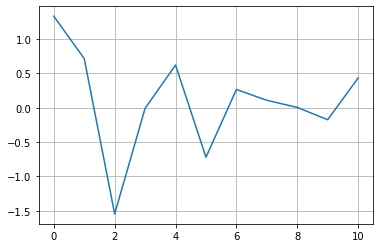

In [36]:
import matplotlib
matplotlib.rcParams["axes.grid"] = True
from matplotlib import pyplot as plt

x = np.linspace(0, 10, 11)
dots = np.random.randn(11)
plt.plot(x, dots)

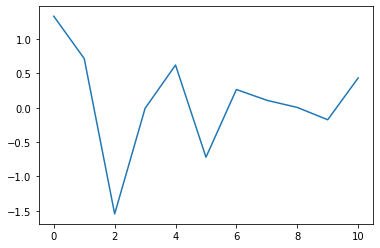

In [37]:
import matplotlib
matplotlib.rcParams["axes.grid"] = False

plt.plot(x, dots)

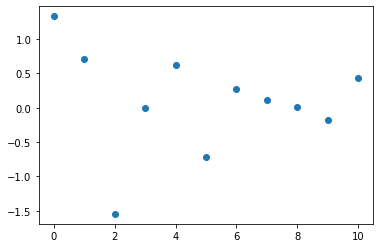

In [38]:
plt.scatter(x, dots)

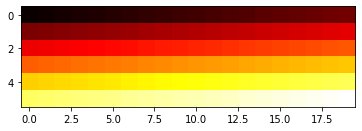

In [39]:
plt.imshow(np.arange(0, 120).reshape(6, 20), 'hot');

# Strings and dicts

In [40]:
a = "totaly random words"
pretty_print(set(a))

{'n', 'o', 'm', 'w', ' ', 't', 'y', 'l', 'a', 'r', 's', 'd'}


In [41]:
from collections import Counter
Counter(a).most_common()

[('o', 3),
 ('t', 2),
 ('a', 2),
 (' ', 2),
 ('r', 2),
 ('d', 2),
 ('l', 1),
 ('y', 1),
 ('n', 1),
 ('m', 1),
 ('w', 1),
 ('s', 1)]

In [42]:
cntr = {}
for c in a.lower():
    if c == " ": 
        continue
    cntr[c] = cntr.get(c, 0) + 1

sorted(cntr.items(), key=lambda x: x[1], reverse=True)

[('o', 3),
 ('t', 2),
 ('a', 2),
 ('r', 2),
 ('d', 2),
 ('l', 1),
 ('y', 1),
 ('n', 1),
 ('m', 1),
 ('w', 1),
 ('s', 1)]